In [1]:
# Demonstrates the effect of collinearity in the coefficients of an estimator.  Each colour in the resulting plot represents a different
# feature of the coefficient vector, and this is displayed as a function of the regularization parameter.
# This example also shows the usefulness of applying ridge regression to highly ill-conditioned matrices.  For such matrices, a slight 
# change in the target variable can cause a huge variance in the calculated weights. In such cases, it is useful to set a certain
# regularization (alpha) to reduce this variation (noise).
# When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero.  At the end of
# the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations.
# In practice it is necessary to tune alpha in such as way that a balance is maintained between both.

In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [4]:
# X is the 10x10 Hilbert matrix (a square matrix with entries being unit fractions)
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

In [13]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

In [15]:
clf = linear_model.Ridge(fit_intercept=False)

In [16]:
coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

(0.01, 1e-10, -175.6201245183189, 274.0230291345643)

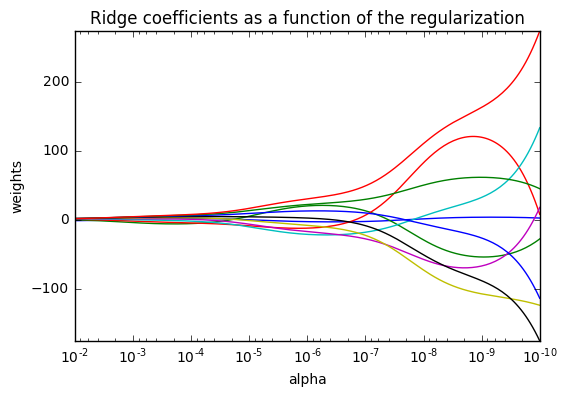

In [19]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse the axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')